<a href="https://colab.research.google.com/github/suryaramadoss1/Jigsaw-Unintended-Bias-in-Toxicity-Classification/blob/master/Copy_of_Blessing's_assig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement & Data Description

#### Problem Statement : To Predict whether a mammogram mass is benign or malignant

#### Data description :

Doctor's assessment: 1 to 5 (ordinal) [This is subjective]

Age: patient's age in years (integer)

Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)

Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)

Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)

Androgen History - Binary 

Previous Visit - Binary

Blood Group - A, B, AB

Severity - Binary


Severity: benign=0 or malignant=1 (binominal)

# New Section

In [0]:
# 1) Converted dummies
# 2) Outliers treatment - 
# 3) Missing value treatment - 
# 4) Different data types
# 5) Train & Test Split
# 6) Feature Engineerring 
#    a) Feature scaling
#    b) Feature selection
# 7) Model Building
#     - SVM 
#     - Trees with ensmb
#     - KNN
#     - NB 
#     - Logistic
#     - ANN -   
# 8) Model Validation - K fold (Accuraries [ 93% ] --- k = 10 folds)
# 9) Model Selection - High Bias & Hi Varience | Low Bias and low variance  | Low Boas and High variance | High Variencce and low varience
# 10) Deployment - Flask ----> Heroku

# SMOTE --- balance data


In [0]:
# Import requiered libraries 
import pandas as pd
import numpy as np

In [0]:
ls

mammographic_masses.csv  sample_data/


In [0]:
# Import dataset
df = pd.read_csv('/content/mammographic_masses.csv')
df.head()

,BI-RADS,age,shape,margin,density,androgen_history,prev_visit,blood_group,severity
0,5.0,67.0,3.0,5.0,3.0,0,1,B,1
1,4.0,43.0,1.0,1.0,NaN,1,0,A,1
2,5.0,58.0,4.0,5.0,3.0,1,0,B,1
3,4.0,28.0,1.0,1.0,3.0,1,0,O,0
4,5.0,74.0,1.0,5.0,NaN,1,0,A,1


## Converting dummies

In [0]:
df = pd.get_dummies(df)
df.head()

,BI-RADS,age,shape,margin,density,androgen_history,prev_visit,severity,blood_group_A,blood_group_AB,blood_group_B,blood_group_O
0,5.0,67.0,3.0,5.0,3.0,0,1,1,0,0,1,0
1,4.0,43.0,1.0,1.0,NaN,1,0,1,1,0,0,0
2,5.0,58.0,4.0,5.0,3.0,1,0,1,0,0,1,0
3,4.0,28.0,1.0,1.0,3.0,1,0,0,0,0,0,1
4,5.0,74.0,1.0,5.0,NaN,1,0,1,1,0,0,0


# Density of missing values //seeing the number of NaN in the different columns/features
print(len(df))
df.isnull().sum()

## Checking for outliers

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


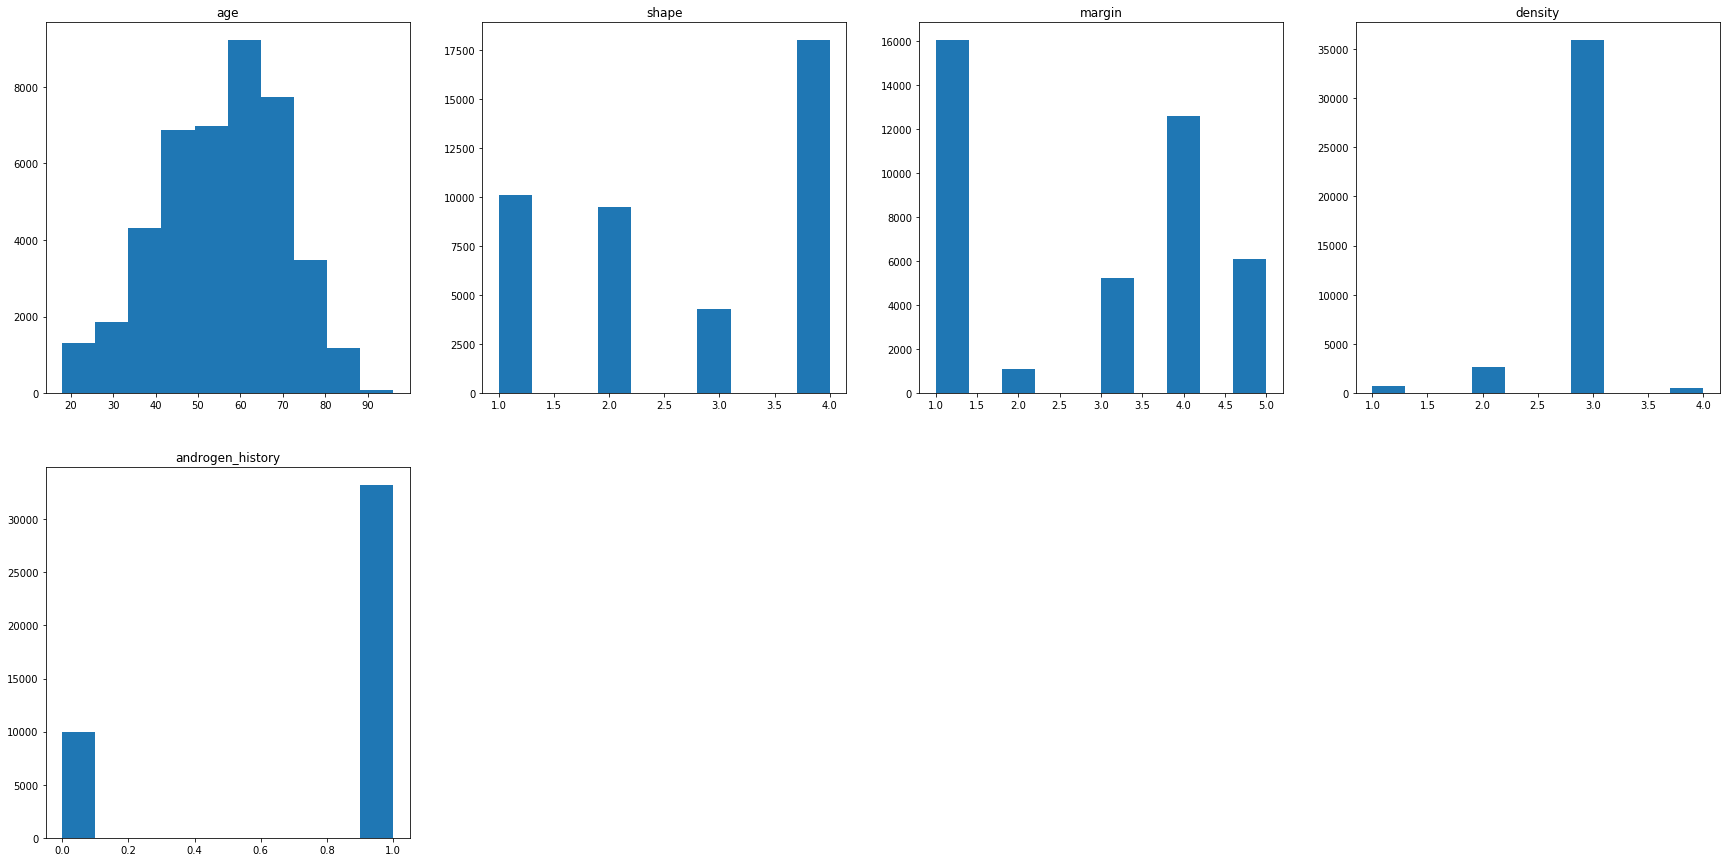

In [0]:
                                                                        import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(30,15))

plt.subplot(241)
plt.title("age")
plt.hist(list(df['age']))

plt.subplot(242)
plt.title("shape")
plt.hist(list(df['shape']))

plt.subplot(243)
plt.title("margin")
plt.hist(list(df['margin']))

plt.subplot(244)
plt.title("density")
plt.hist(list(df['density']))

plt.subplot(245)
plt.title("androgen_history")
plt.hist(list(df['androgen_history']))


plt.show()

# 2SD - 

## Treatment of missing values

In [0]:
df.isnull().sum()

# Any one of the following strategy 
# For skewed data - Median
# Normal - Median / Mean
# Category - Mode

from sklearn.preprocessing import Imputer
import numpy as np

#1. mean strategy

# data = df.copy()
# imputer = Imputer(missing_values = np.NAN, strategy = "mean")
# data.iloc[:,:] = imputer.fit_transform(data.iloc[:,:])

#2. most_frequent startegy

# data = df.copy()
# imputer = Imputer(missing_values = np.NAN, strategy = "most_frequent")
# data.iloc[:,:] = imputer.fit_transform(data.iloc[:,:])

#3. median strategy <-- prefered

data = df.copy()
imputer = Imputer(missing_values = np.NAN, strategy = "median")
data.iloc[:,:] = imputer.fit_transform(data.iloc[:,:])

# Predictive approach of replacement 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Different types of data

In [0]:
data.dtypes

# np.astype()

BI-RADS             float64
age                 float64
shape               float64
margin              float64
density             float64
androgen_history    float64
prev_visit          float64
severity            float64
blood_group_A       float64
blood_group_AB      float64
blood_group_B       float64
blood_group_O       float64
dtype: object

## Drop Irrelavant feature 

In [0]:
del data['BI-RADS']

In [0]:
data.head()

,age,shape,margin,density,androgen_history,prev_visit,severity,blood_group_A,blood_group_AB,blood_group_B,blood_group_O
0,67.0,3.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,43.0,1.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,58.0,4.0,5.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,28.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,74.0,1.0,5.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


## Train Test Split

In [0]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [0]:
print(len(X_train))
print(len(X_test))

34596
8649


## Feature scaling


In [0]:
# 1 - > Standard scalar  --- > Mean = 0 and Std dev = 1 --> z = (x-mean(x))/sd(x)
# 2 - > Normalizer       ----> ? Have a look at working of both these scaling techniques
# 3 - > Min Max scalar   ----> ? 

# Negative to non-negetive - > e(x)

# Skew - > Normal ---------> log ---- > 

# Linear Reg -> 1 - Normally distributed, 2.- Homoscedacity 3 - Lnear relationship 4- Multico--

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building & Evaluation

In [0]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [    0     1     2 ... 43240 43241 43244] Validation: [    6    18    22 ... 43234 43242 43243]
Train: [    0     1     2 ... 43241 43242 43243] Validation: [    3     4     7 ... 43236 43240 43244]
Train: [    1     2     3 ... 43242 43243 43244] Validation: [    0     8     9 ... 43218 43219 43222]
Train: [    0     3     4 ... 43242 43243 43244] Validation: [    1     2     5 ... 43235 43237 43238]
Train: [    0     1     2 ... 43242 43243 43244] Validation: [   10    11    13 ... 43228 43239 43241]
Train: [    0     1     2 ... 43240 43242 43244] Validation: [    7    15    18 ... 43237 43241 43243]
Train: [    0     1     2 ... 43241 43243 43244] Validation: [    3     8    11 ... 43234 43240 43242]
Train: [    0     2     3 ... 43242 43243 43244] Validation: [    1    12    14 ... 43227 43228 43229]
Train: [    0     1     3 ... 43242 43243 43244] Validation: [    2     6     9 ... 43231 43232 43239]
Train: [    1     2     3 ... 43241 43242 43243] Validation: [    0     4

In [0]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train,Y_train)
LR_pred = LR.predict(X_test)
print("Logistic Regression:" )
print(accuracy_score(Y_test,LR_pred))
print(classification_report(Y_test, LR_pred))

Logistic Regression:
0.7597410105214476
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      6571
         1.0       0.00      0.00      0.00      2078

    accuracy                           0.76      8649
   macro avg       0.38      0.50      0.43      8649
weighted avg       0.58      0.76      0.66      8649



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,Y_train)  
svm_pred = svm.predict(X_test)
print(accuracy_score(Y_test,svm_pred))
print(classification_report(Y_test, svm_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7597410105214476
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      6571
         1.0       0.00      0.00      0.00      2078

    accuracy                           0.76      8649
   macro avg       0.38      0.50      0.43      8649
weighted avg       0.58      0.76      0.66      8649



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
DT_pred = DT.predict(X_test)
print (accuracy_score(Y_test,DT_pred))
print(classification_report(Y_test, DT_pred))

0.7227425135853855
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84      6571
         1.0       0.24      0.07      0.11      2078

    accuracy                           0.72      8649
   macro avg       0.50      0.50      0.47      8649
weighted avg       0.63      0.72      0.66      8649



In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = model,
param_grid = parameters,
scoring = 'accuracy',
cv = 10,
n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)

In [0]:
DecisionTreeClassifier().get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [0]:
accuracy = grid_search.best_score_
print(accuracy)

0.7563013065094231


In [0]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(random_state=0)
Rf.fit(X_train,Y_train)
Rf_pred = Rf.predict(X_test)
print(accuracy_score(Y_test,Rf_pred))
print(classification_report(Y_test,Rf_pred))



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7062088102670829
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      6571
         1.0       0.23      0.10      0.14      2078

    accuracy                           0.71      8649
   macro avg       0.49      0.50      0.48      8649
weighted avg       0.63      0.71      0.66      8649



In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = model,
param_grid = parameters,
scoring = 'accuracy',
cv = 10,
n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)

In [0]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)
XGB_pred = XGB.predict(X_test)
print(accuracy_score(Y_test,XGB_pred))
print(classification_report(Y_test, XGB_pred))

0.7592785293097468
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      6571
         1.0       0.00      0.00      0.00      2078

    accuracy                           0.76      8649
   macro avg       0.38      0.50      0.43      8649
weighted avg       0.58      0.76      0.66      8649



In [0]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
KNN_pred = KNN.predict(X_test)
print(accuracy_score(Y_test,KNN_pred))
print(classification_report(Y_test, KNN_pred))

0.70146837784715
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      6571
         1.0       0.20      0.08      0.12      2078

    accuracy                           0.70      8649
   macro avg       0.48      0.49      0.47      8649
weighted avg       0.62      0.70      0.65      8649



In [0]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, Y_train)
NB_pred= NB.predict(X_test)
print(accuracy_score(Y_test,NB_pred))
print(classification_report(Y_test, NB_pred))

0.7597410105214476
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      6571
         1.0       0.00      0.00      0.00      2078

    accuracy                           0.76      8649
   macro avg       0.38      0.50      0.43      8649
weighted avg       0.58      0.76      0.66      8649



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
values = [ (0.76, 0.58, 0.76, 0.66) ,
             (0.72, 0.63, 0.72, 0.66 ) ,
             (0.70, 0.63, 0.71, 0.66 ) ,
             (0.76, 0.58, 0.76, 0.66 ) ,
             (0.76, 0.58, 0.76, 0.66) ,
             (0.76, 0.58, 0.76, 0.66) ,
             (0.70, 0.62, 0.70, 0.65) ]
dfObj = pd.DataFrame(values, columns=['Accuracy', 'Precision', 'Recall', 'f1 Score'], index=['SVM', 'DT', 'RF', 'XG', 'LR', 'NB', 'KNN'])
 
print(dfObj)

     Accuracy  Precision  Recall  f1 Score
SVM      0.76       0.58    0.76      0.66
DT       0.72       0.63    0.72      0.66
RF       0.70       0.63    0.71      0.66
XG       0.76       0.58    0.76      0.66
LR       0.76       0.58    0.76      0.66
NB       0.76       0.58    0.76      0.66
KNN      0.70       0.62    0.70      0.65
